**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1TxsZI7Wetzp1IqMaeE1DsVGuIM8RJ8zq?usp=sharing)

3. [Практика 2](https://colab.research.google.com/drive/1_Ww5DyQ2LU8BHWKq8txtwJ1cEN9sWmef?usp=sharing)



## Введение

Впервые идея GAN была опубликована в работе Generative Adversarial Nets, Goodfellow et al 2014.   Яна Гудфеллоу и других исследователей университета Монреаля, включая Yoshua Bengio. Директор Facebook по исследованиям искусственного интеллекта. Ян ЛеКун (Yann LeCun) назвал состязательную тренировку сетей “самой интересной идеей в машинном обучении за последние 10 лет”.

Прежде чем углубляться в детали, давайте кратко рассмотрим, для чего предназначены GAN. Генеративные Состязательные Сети принадлежат к набору генеративных моделей. Это означает, что они могут производить / генерировать (мы увидим, как) новый контент. Стоит заметить, что преимущественно GAN используются для создания изображений. Чтобы проиллюстрировать это понятие «генеративных моделей», мы можем взглянуть на некоторые хорошо известные примеры результатов, полученных с помощью GAN.

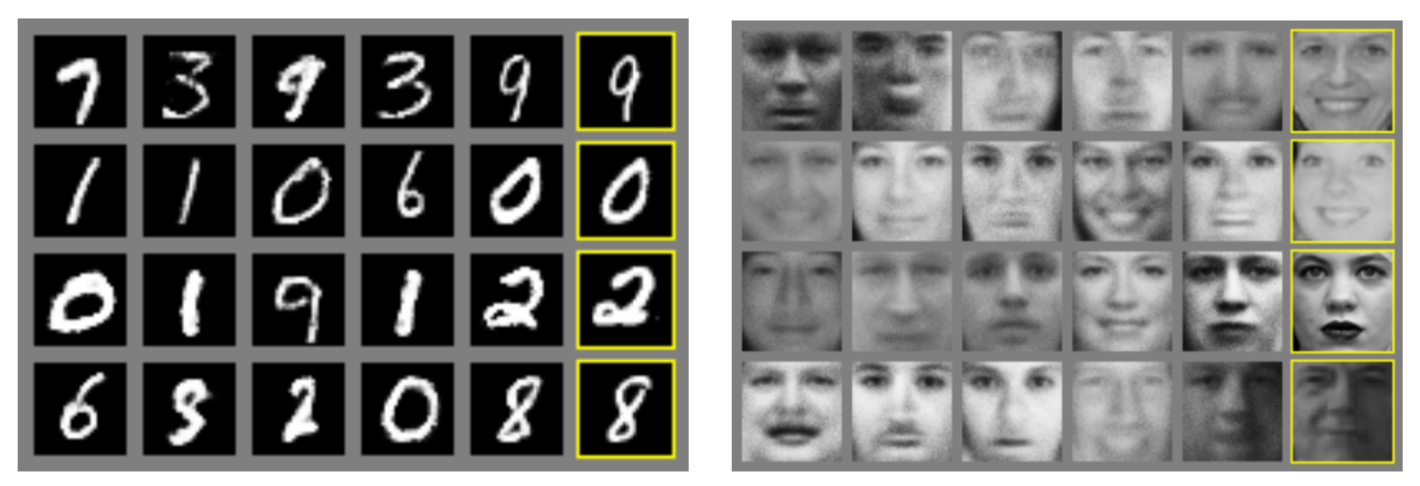
Иллюстрации способностей GAN Яна Гудфеллоу и соавторов. Это образцы, сгенерированные генерирующими состязательными сетями после обучения на двух наборах данных: MNIST и TFD.

Для обоих картинок, крайний правый столбец содержит истинные данные, которые являются ближайшими от непосредственно соседних сгенерированных выборок. Это показывает нам, что полученные данные действительно генерируются, а не только запоминаются сетью.

А вот развитие данной идеи. Реалистичные изображения несуществующих людей, созданные с помощью PGGAN - прогрессивной генеративной нейросетью от Nvidia

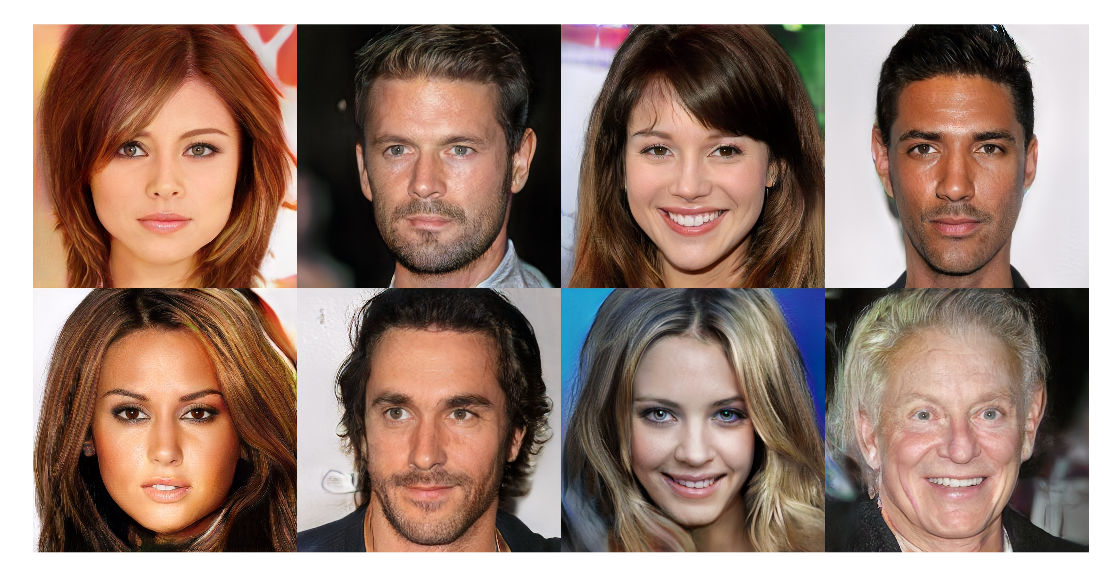


**GAN** - архитектура, состоит из двух нейронных сетей **генератора** и **дискриминатора**, настроенных на работу друг против друга. Отсюда GAN и получила название **генеративно-созтязательная**. В случае работы с изображениями, во всем остальном — это сверточная нейронная сеть.

**Генератор** - генерирует образцы, используя набор переменных скрытого пространства

**Дискриминатор** - оценивает отличие сгенерированных образцов от образцов тренировочного набора.

Конечная цель этих двух нейросетей — сгенерировать образец, в котором не будут угадываться черты тренировочных образцов, но при этом он будет выглядеть как один из них.

Типичная схема GAN представлена на рисунке ниже

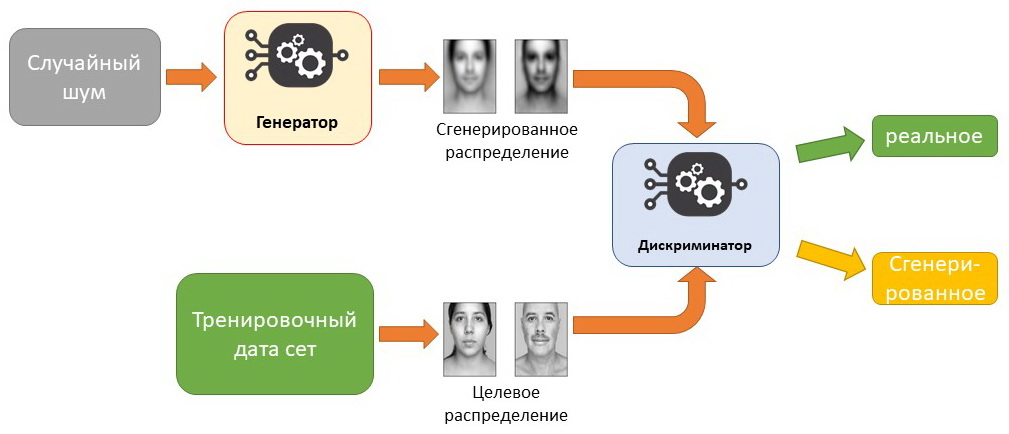

Основные характеристики **GANs** — это качество созданного образца (насколько он похож на тренировочные) и вариативность (отличие его особенностей от образцов тренировочного датасета). Цель заключается в максимизации обоих этих параметров. Но на пути к этой цели возникают несколько проблем, требующих детального рассмотрения. Следует сказать, что возможно добиться только компромисса между качеством и вариативностью, так как повышение качества ведёт к понижению вариативности.

С увеличением размерности данных возрастает сложность такой генерации. Создание изображения с высоким разрешением становится трудной задачей по двум причинам. Во-первых, на изображении не воспроизводятся мелкие детали, что легко заметить при большом разрешении. И во-вторых, процесс обучения занимает много времени, что ведёт к его нестабильности.

## Углубленный взгляд

Предположим, мы хотим генерировать (создавать) изображения миниатюрных собак (для простоты 5х5 пикселей). Как на рисунке ниже:

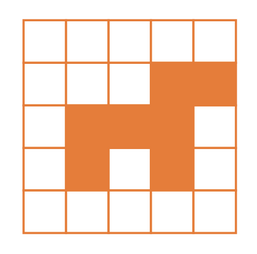

Мы можем изменить каждую картинку как $N = 5*5$ размерный вектор(расположив столбцы друг над другом) так, чтобы изображение собаки могло быть представлено вектором. Как на рисунке ниже

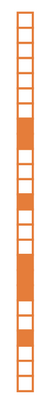

Теперь, мы можем сказать, что N-мерные векторы, которые эффективно дают нечто, похожее на собаку, распределены в соответствии с очень специфическим распределением вероятностей по всему N-мерному векторному пространству (некоторые точки этого пространства с большой вероятностью представляют собак, а другие с меньшей). В том же духе в этом N-мерном векторном пространстве существуют распределения вероятностей для изображений кошек, птиц и так далее.

Тогда задача генерации нового изображения собаки сводится к задаче генерации нового вектора, похожего на "распределение вероятностей собаки" в N-мерном векторном пространстве. Иными совами перед нами стоит задача генерации случайной величины относительно определенного распределения вероятностей.

Наша первая проблема при попытке создать наш новый образ собаки состоит в том, что «распределение вероятностей собаки» по N-мерному векторному пространству является очень сложным, и мы не знаем, как напрямую генерировать сложные случайные величины. При этом мы понимаем, что нам нужно выразить наш N-мерный случайный вектор (будущей собаки), как результат очень сложной функции, примененной к простому N-мерному вектору со случайным распределением.

Здесь надо подчеркнуть тот факт, что найти функцию преобразования не так просто, так как она не может быть явно выражена, и, следовательно, мы должны моделировать её на основе данных (обучающего набора данных). Что подразумевает моделирование нейронной сети.

Идея состоит в том, что бы смоделировать функцию преобразования нейронной сетью, которая принимает в качестве входных данных простой N-мерный вектор с равномерным случайным распределением и которая возвращает на выходе другой N-мерный случайны вектор, который должен быть похож после обучения правильному "распределению вероятности собаки"

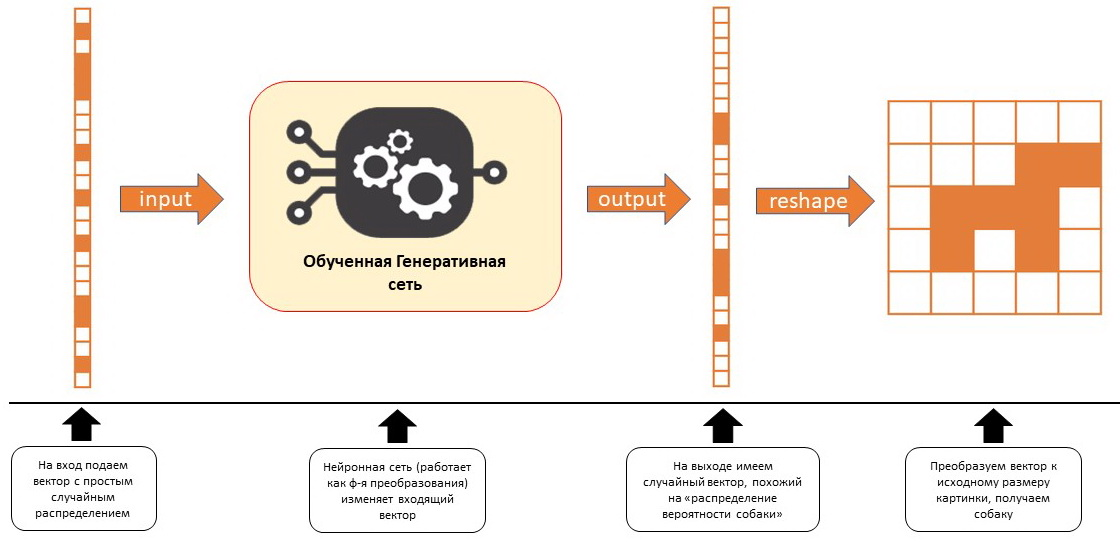

## GAN и GMN в чем разница?

Ранее мы говорили, что задача генерации нового изображения собаки может быть преобразована в задачу генерации случайного вектора в N-мерном векторном пространстве, которое соответствует "распределению вероятности собаки". Мы предложили использовать метод преобразования, с нейронной сетью для моделирования функции преобразования.

Теперь перед нами стоит другая задача. Как обучить генеративную сеть, чтобы выразить правильную ф-ю преобразования. (иными словами из шума генерировать заданное изображение)

Для этих целей мы можем предложить два разных метода обучения: прямой и косвенный.

1. Метод прямого обучения состоит в сравнении истинного и сгенерированного распределения вероятностей (изображения) и обратном распространении ошибки по сети. Эта идея реализована в GMN сетях (Generative Matching Networks).



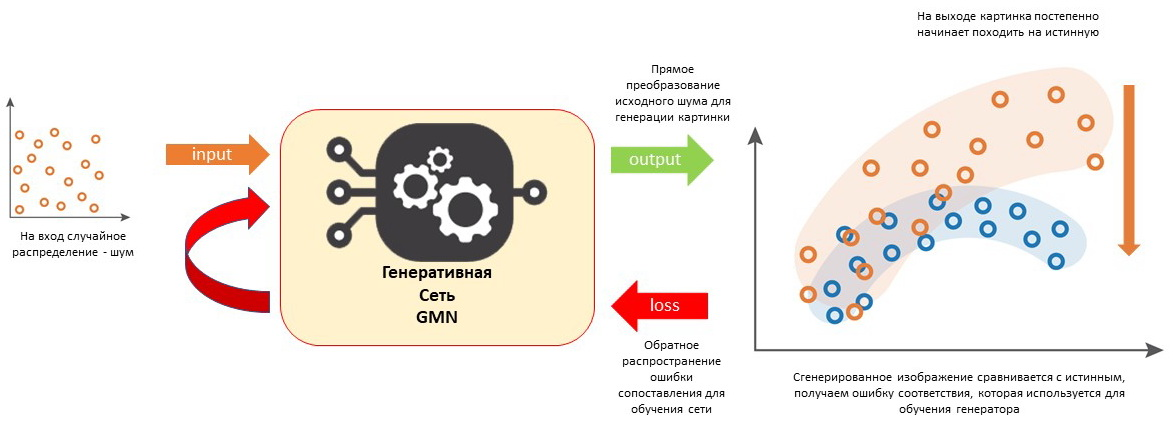

Генеративные сети соответствия (GMN) принимают простые случайные входные данные (шум), генерируют новые данные, напрямую сравнивают сегнерированные данные с истинными и распространяют ошибку сопоставления для обучению сети.

2. Метод косвенного обучения не подразумевает напрямую сравнение исходного и сгенерированного изображения (распределения). Вместо этого мы обучаем генеративную сеть, заставляя эти два изображения (распределения) проходить через нижестоящую задачу (дискриминатор), созданный таким образом, что бы процесс оптимизации генеративной сети (генератора) засталял сгенерированный контент быть близким к реальному изображению (истинному распределению)

## GAN - Непрямой метод обучения

Блестящая идея, которая воплотилась в GAN, состоит в том, что бы заменить прямое сравение косвенным. Была предложена структура для оценки генеративных моделей с помощью состязательного процесса, в котором мы одновременно обучаем две модели: генеративную модель G (генератор), которая фиксирует распределение данных, и дискриминативную модель D (дискриминатор), которая оценивает вероятность того, что выборка была получена из обучающих данных, а не сгенерирована G. Процедура обучения Генератора (G) состоит в том, чтобы максимизировать вероятность ошики Дискирминатора (D)

Таким образом, в архитекутре GAN у нас есть **дискриминатор**, который обучается оценивает образцы истинных и сгенерированных данных и пытающийся их классифицировать как можно лучше, и **генератор**, который учится максимально обмануть дискриминатор и выдать сгенерированные данные за истинные.

Теперь рассмотрим, что конкретно из себя представляют **генератор** и **дискриминаторв** архитектуре GAN.

**Генератор** - это нейронная сеть, которая моделирует ф-ю преобразования. Он принимает в качестве входных данных простую случайную переменную (шум) и должен вернуть после обучения случайную переменную, которая следуюет за целевым респределением.

**Дискриминатор** - это нейронная сеть, которая моделирует дискриминационную ф-ю. Он принимает на вход семпл (в нашем примере N-мерный вектор) и возвращает в качестве выхдных данных вероятность того, что этот семпл будет "истиной".

После инициализации эти две сети могут быть совместно обучены (в одно и тоже время) с противоположными целями:

*  Цель генератора обмануть дискриминатор, т.е. генеративная нейросеть обучается максимизировать ошибку классификации (между истинными и сгенерированными данными)
*   Цель дискриминатора состоит в обнаружении поддельных сгенерированных данных, поэтому дискриминирающая нейросеть обучается минимизировать ошибку классификации

Таким образом, на каждой итерации процесса обучения, весовые коэффициенты генеративной сети обновляются с целью увеличения ошибки классификации (подъем градиента ошибок по параметрам генератора), тогда как весовые коэффициенты дискриминирующей сети обновляются так, чтобы уменьшить эту ошибку ( спуск градиента ошибок по параметрам дискриминатора).


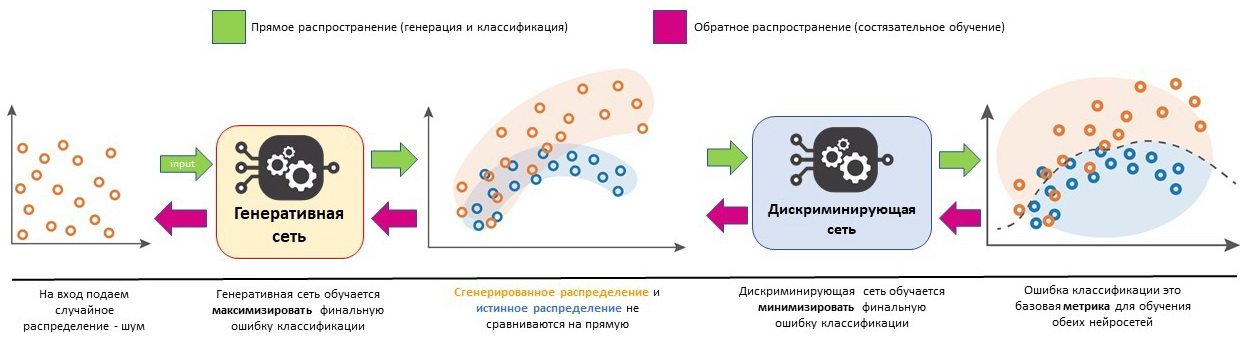

Эти противоположные цели и подразумеваемое понятие состязательности двух сетей объясняют название «состязательных сетей»: обе сети пытаются победить друг друга, и, тем самым, они становятся все лучше и лучше. Конкуренция между ними заставляет эти две сети «прогрессировать» относительно их соответствующих целей. С точки зрения теории игр, мы можем думать об этом параметре как о минимаксной игре для двух игроков, где состояние равновесия соответствует ситуации, когда генератор генерирует данные из точного целевого распределения и где дискриминатор предсказывает «истинно» или «сгенерировано» С вероятностью 1/2 для любой полученной точки.

## Резюме
**Итак давайте подытожим, что же мы узнали о GAN**

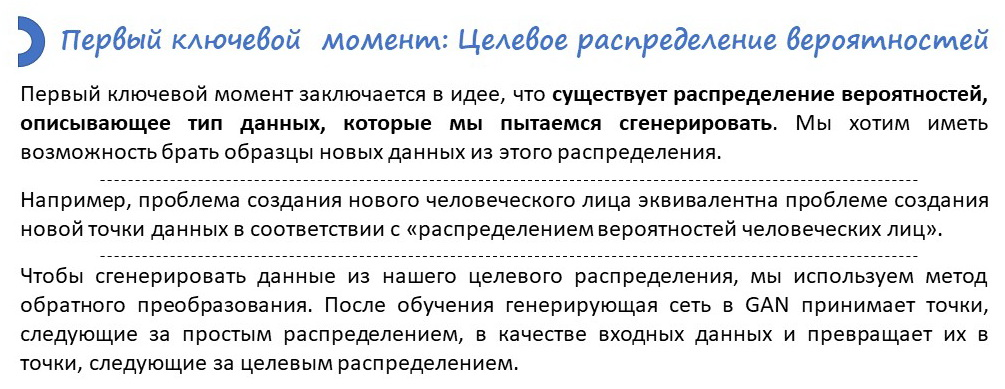

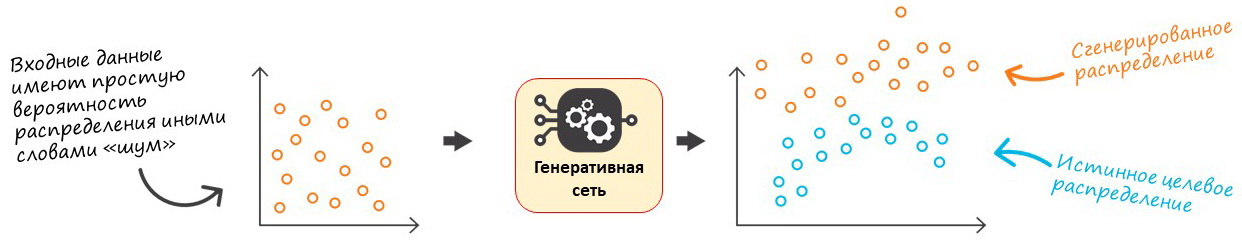

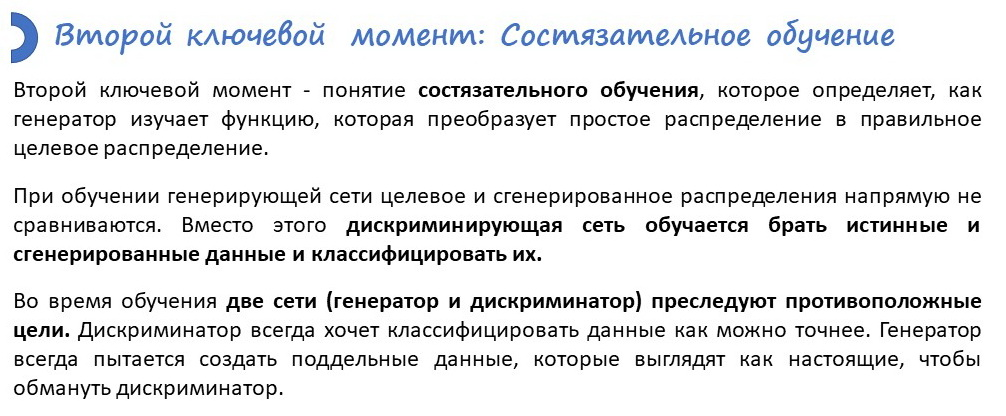

Посмотрим, что происходит в динамике:

**Начало цикла**


---

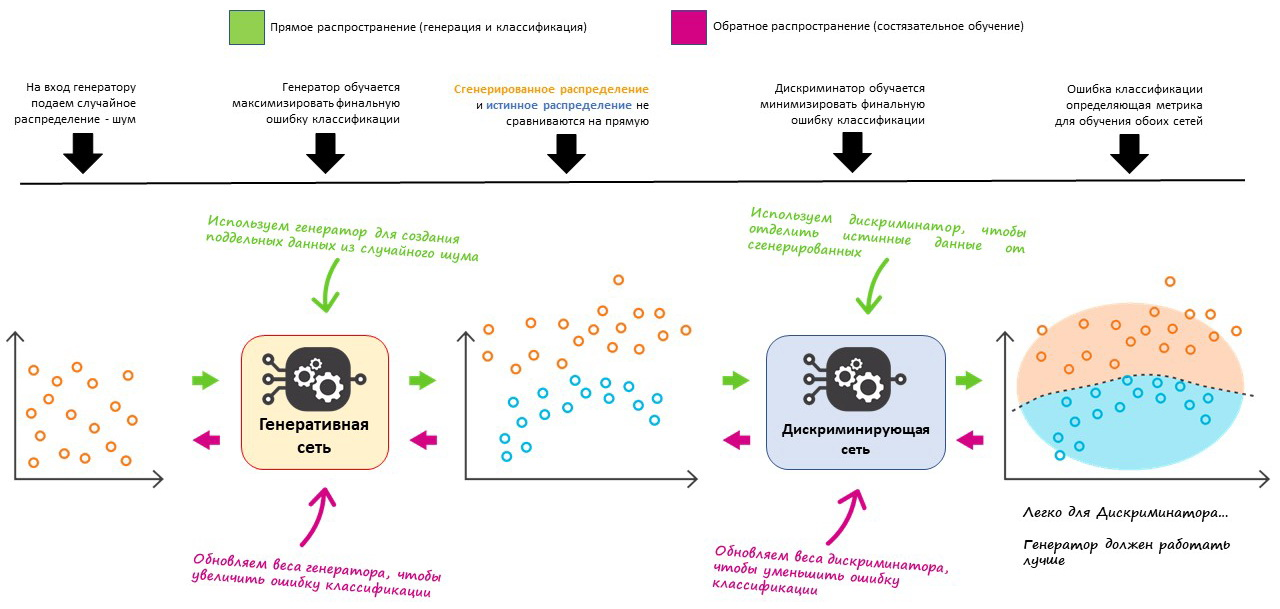

**Середина цикла**


---



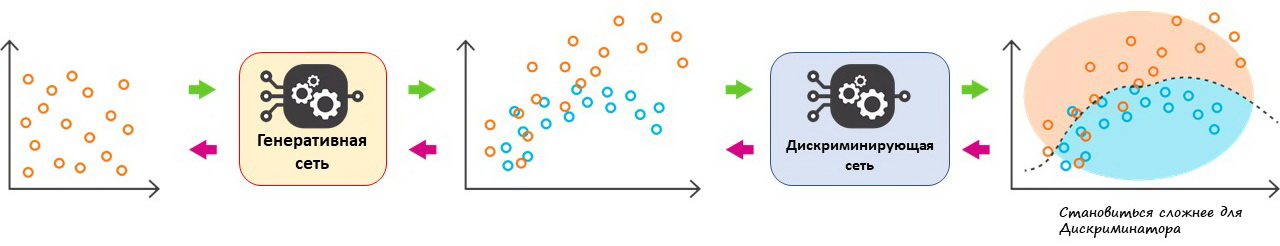

**Конец цикла**


---



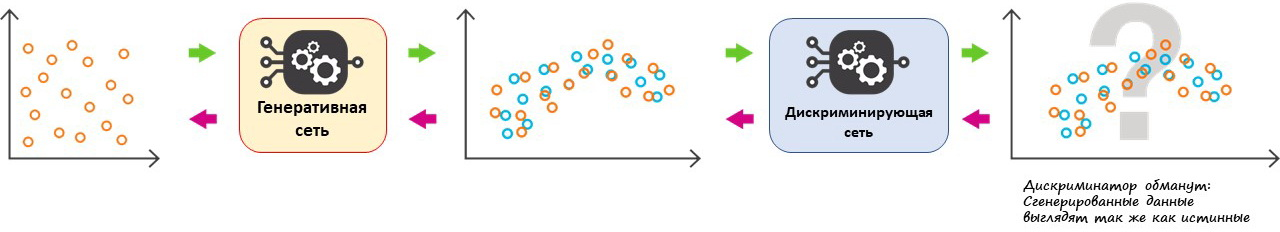

## Проблемы обучения GAN

Ранее мы разобрали основные аспекты архитектуры GAN. Генеративно состязательные сети обладают огромным количеством достоинств, но у них есть один существенный недостаток - их очень сложно обучать. 

Одна из причин кроется в том, что тренировочный просесс GAN по своей природе нестабилен. Это связано с одновременной динамической тренировкой двух конкурирующих нейросетей, из чего вытекает, что улучшения одной модели происходят за счет другой модели.

В итоге цель обучения двух моделей заключается в нахождении точки равновесия (т.н. седловой точки) между двумя конкурирующими задачами. Т.е. обучение GAN состоит в нахождении равновесия Нэша для антагонистической игры двух игроков.


---


Равнове́сие Нэ́ша — концепция решения, одно из ключевых понятий теории игр. Так называется набор стратегий в игре для двух и более игроков, в котором ни один участник не может увеличить выигрыш, изменив свою стратегию, если другие участники своих стратегий не меняют. Джон Нэш доказал существование такого равновесия в смешанных стратегиях в любой конечной игре.


---

К сожалению найти равновесие по Нэшу очень сложно. Существуют алгоритмы для специализированных случаев, но мы не знаем ни одного, который можно применить к игре GAN.


В терминах нейронных сетей техническая сложность обучения двух конкурирующих моделей одновременно заключается в том, что они могут не сойтись.


*   Самая большая проблема, стоящая перед GAN, которую исследователи должны решить, – это проблема неконвергенции.
*   При обучении GAN несмотря на то что векторные поля для генератора и дискриминатора по отдельности являются потенциальными (это же градиетны), суммарное векторное поле не будет потенциальным. А это означает, что в этом поле могут быть замкнутые кривые, т.е мы можем ходить кругами. А это очень и очень плохо.



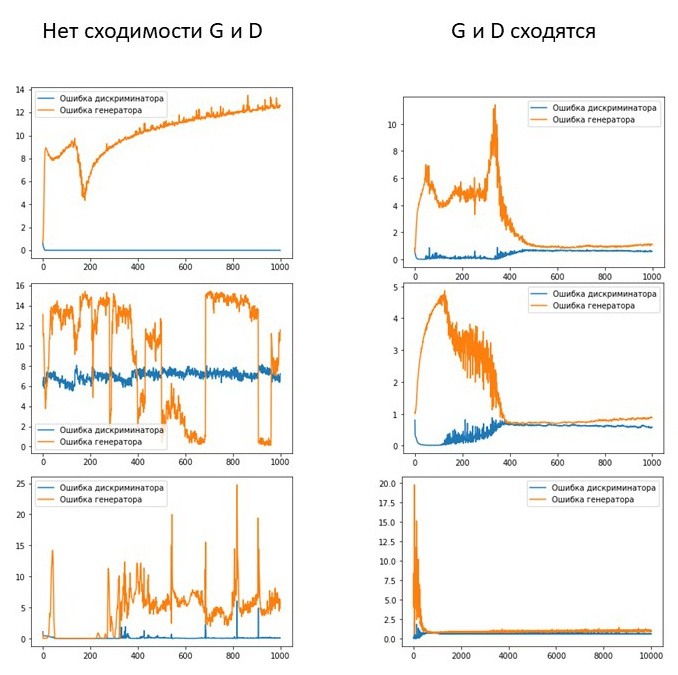

Мы здесь не будем детально углубляться в проблемы обучения GAN. На эту тему написана масса научных статей. Задача данной главы была лишь подсветить основные из них. Но важно понимать, что GAN очень чувствительны к параметризации нейронных сетей:


*   выбору функции активации
*   использованию DropOut
*   использованию BatchNormalization 
и т.д.

Стабилизация обучения GAN остается открытой проблемой. К счатью GAN-обучение хорошо работает, если тщательно подобрать архитектуру моделей и гиперпараметры.

Возможно, одним из наиболее важных шагов в разработке и обучении стабильных моделей GAN стала статья Алек Рэдфорд и соавторов, опубликованная в 2015 году под названием «Репрезентативное обучение с использованием неконтролируемых генеративных состязательных сетей».
Рэдфорд и соавторы (2015г) создали глубокую сверточную GAN (DCGAN), которая очень хорошо справляется с задачами синтеза изображений.


**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1TxsZI7Wetzp1IqMaeE1DsVGuIM8RJ8zq?usp=sharing)

3. [Практика 2](https://colab.research.google.com/drive/1_Ww5DyQ2LU8BHWKq8txtwJ1cEN9sWmef?usp=sharing)

